In [3]:
!pip install pytrends

In [1]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import datetime
from pytrends.request import TrendReq
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web


# Login to Google
pytrend = TrendReq()
# Get today date
today_date = datetime.datetime.now().strftime('%Y-%m-%d')

Google Trend (pytrends library) REAME.md link --> https://github.com/GeneralMills/pytrends/blob/master/README.md

### Google Trend - Last 5 Years (Weekly Trend)

In [2]:
pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ["bitcoin", "crypto", "ethereum", "cardano", "dogecoin"]
pytrends.build_payload(kw_list, cat=1138, timeframe='today 5-y', geo='', gprop='') #category = business finance

# returns historical, indexed data for when the keyword was searched most as shown on Google Trends' Interest Over Time section.
google_trend_5y = pytrends.interest_over_time()

In [3]:
google_trend_5y

,bitcoin,crypto,ethereum,cardano,dogecoin,isPartial
date,,,,,,
2016-08-28,2,1,0,0,0,False
2016-09-04,3,0,0,1,1,False
2016-09-11,0,1,0,1,0,False
2016-09-18,1,0,1,0,0,False
2016-09-25,4,1,1,0,0,False
...,...,...,...,...,...,...
2021-07-18,30,9,6,1,3,False
2021-07-25,40,10,4,2,2,False
2021-08-01,30,10,7,0,1,False


In [4]:
google_trend_5y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2016-08-28 to 2021-08-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bitcoin    260 non-null    int64 
 1   crypto     260 non-null    int64 
 2   ethereum   260 non-null    int64 
 3   cardano    260 non-null    int64 
 4   dogecoin   260 non-null    int64 
 5   isPartial  260 non-null    object
dtypes: int64(5), object(1)
memory usage: 14.2+ KB


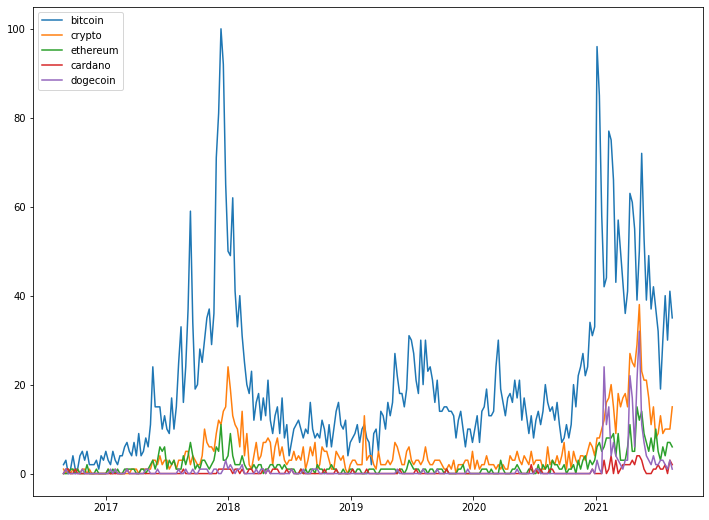

In [6]:
plt.figure(figsize=(12, 9))
plt.plot(google_trend_5y.index, google_trend_5y['bitcoin'], label='bitcoin')
plt.plot(google_trend_5y.index, google_trend_5y['crypto'], label='crypto')
plt.plot(google_trend_5y.index, google_trend_5y['ethereum'], label='ethereum')
plt.plot(google_trend_5y.index, google_trend_5y['cardano'], label='cardano')
plt.plot(google_trend_5y.index, google_trend_5y['dogecoin'], label='dogecoin')
plt.legend(loc="upper left");

### Google Trend 3 Months:  April 6 - July 6, 2021

In [12]:
pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ["bitcoin", "crypto", "ethereum", "cardano", "dogecoin"]
pytrends.build_payload(kw_list, cat=1138, timeframe='2021-04-07 2021-07-06', geo='', gprop='') #category = business finance

# returns historical, indexed data for when the keyword was searched most as shown on Google Trends' Interest Over Time section.
google_trend_3m = pytrends.interest_over_time()

In [13]:
google_trend_3m

,bitcoin,crypto,ethereum,cardano,dogecoin,isPartial
date,,,,,,
2021-04-07,50,16,3,3,3,False
2021-04-08,38,16,8,0,0,False
2021-04-09,24,16,5,0,3,False
2021-04-10,45,18,3,0,0,False
2021-04-11,48,15,9,0,6,False
...,...,...,...,...,...,...
2021-07-02,40,3,14,3,0,False
2021-07-03,31,9,9,3,0,False
2021-07-04,22,13,6,3,3,False


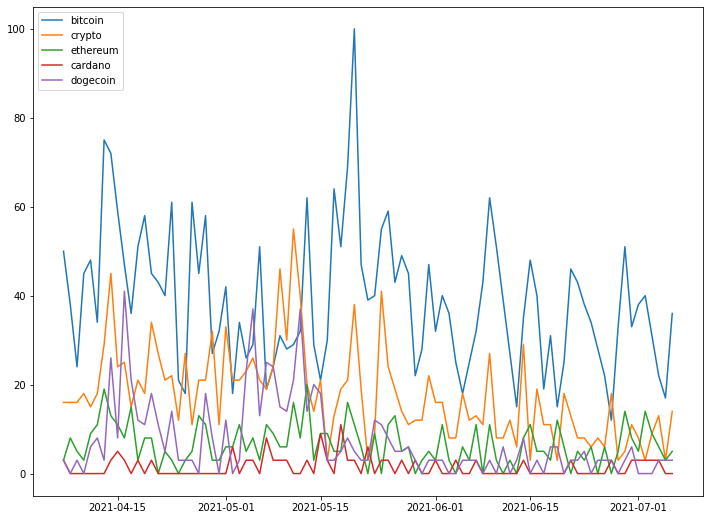

In [14]:
plt.figure(figsize=(12, 9))
plt.plot(google_trend_3m.index, google_trend_3m['bitcoin'], label='bitcoin')
plt.plot(google_trend_3m.index, google_trend_3m['crypto'], label='crypto')
plt.plot(google_trend_3m.index, google_trend_3m['ethereum'], label='ethereum')
plt.plot(google_trend_3m.index, google_trend_3m['cardano'], label='cardano')
plt.plot(google_trend_3m.index, google_trend_3m['dogecoin'], label='dogecoin')
plt.legend(loc="upper left");

### Export Data

In [17]:
google_trend_5y.to_csv('data/google_trend_5y.csv')
google_trend_3m.to_csv('data/google_trend_3m.csv')